# Anomaly Detection Project

### Project Scenario

Hello,

I have some questions for you that I need to be answered before the board meeting Thursday afternoon. I need to be able to speak to the following questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?

### Other info:


• To get 100 on this project you only need to answer 5 out of the 7 questions (along with the other deliverables listed below i.e. slide, your notebook, etc).

• Submit a link to a final notebook on GitHub that asks and answers questions - document the work you do to justify findings

• Compose an email with the answers to the questions/your findings, and in the email, include the link to your notebook in GitHub and attach your slide.

• You will not present this, so be sure that the details you need your leader to convey/understand are clearly communicated in the email.

• Your slide should be like an executive summary and be in form to present.

• Continue to use best practices of acquire.py, prepare.py, etc.

• Since there is no modeling to be done for this project, there is no need to split the data into train/validate/test

• The cohort schedule is in the SQL database, and alumni.codeup.com has info as well.

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn import metrics
from env import user, host, password

In [2]:
# sets up a secure connection to the Codeup db using my login infor
def get_db_url(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [3]:
# assigns the curriculum_logs url to the variable name 'url' so it can be used in additional functions
url = get_db_url('curriculum_logs')

In [4]:
# creating functions to use in my notebook
def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my env file to create a connection url to access
    the Codeup database. '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [5]:
def curriculum_data():
    '''
    This function get the curriculum data from the codeup database
    '''

    sql_query = '''select *
    FROM logs
    LEFT JOIN cohorts on cohorts.id = logs.user_id
    '''
    
    return pd.read_sql(sql_query, get_connection('curriculum_logs'))

In [6]:
def get_curriculum_data():
    '''
    Reading curriculum data from codeup database and creates a csv file into a dataframe
    '''
    if os.path.isfile('curriculum_logs.csv'):
        
        # If csv file exists read in data from csv file.
        df = pd.read_csv('curriculum_logs.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame
        df = curriculum_data()
     
        # Cache data
        df.to_csv('curriculum_logs.csv')
        
    return df

In [7]:
df = get_curriculum_data()

In [8]:
df.head() #check_yo_head

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2.0,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0


In [9]:
df.isna().sum()

date               0
time               0
path               1
user_id            0
cohort_id      52893
ip                 0
id            826484
name          826484
slack         826484
start_date    826484
end_date      826484
created_at    826484
updated_at    826484
deleted_at    900223
program_id    826484
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        900223 non-null  object 
 1   time        900223 non-null  object 
 2   path        900222 non-null  object 
 3   user_id     900223 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          900223 non-null  object 
 6   id          73739 non-null   float64
 7   name        73739 non-null   object 
 8   slack       73739 non-null   object 
 9   start_date  73739 non-null   object 
 10  end_date    73739 non-null   object 
 11  created_at  73739 non-null   object 
 12  updated_at  73739 non-null   object 
 13  deleted_at  0 non-null       object 
 14  program_id  73739 non-null   float64
dtypes: float64(3), int64(1), object(11)
memory usage: 103.0+ MB


In [11]:
df.cohort_id.nunique()

47

In [12]:
df.ip.value_counts().head()

97.105.19.58       284579
97.105.19.61        61662
192.171.117.210      9515
71.150.217.33        6791
76.185.145.231       4754
Name: ip, dtype: int64

In [13]:
df.ip.value_counts(normalize=True).head()

97.105.19.58       0.316121
97.105.19.61       0.068496
192.171.117.210    0.010570
71.150.217.33      0.007544
76.185.145.231     0.005281
Name: ip, dtype: float64

In [14]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )

In [15]:
ip_df = value_counts_and_frequencies(df.ip)
ip_df.head()

,count,proba
97.105.19.58,284579,0.316121
97.105.19.61,61662,0.068496
192.171.117.210,9515,0.010570
71.150.217.33,6791,0.007544
76.185.145.231,4754,0.005281


<AxesSubplot:>

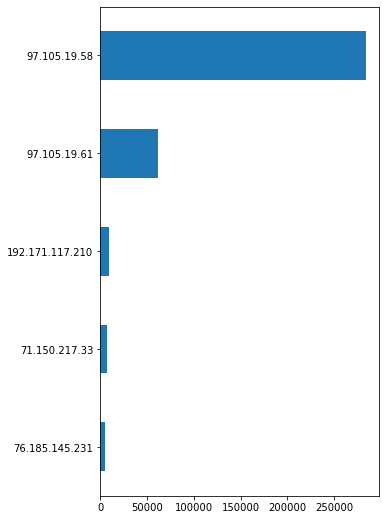

In [16]:
ip_df['count'].sort_values().tail(5).plot.barh(figsize=(5, 9))

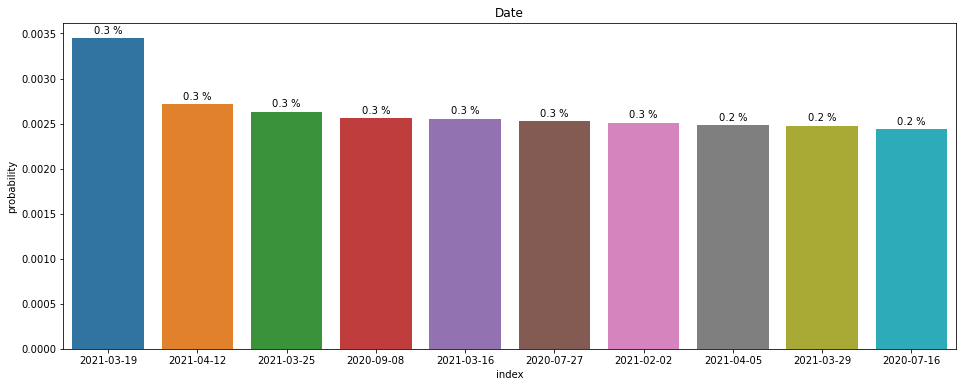

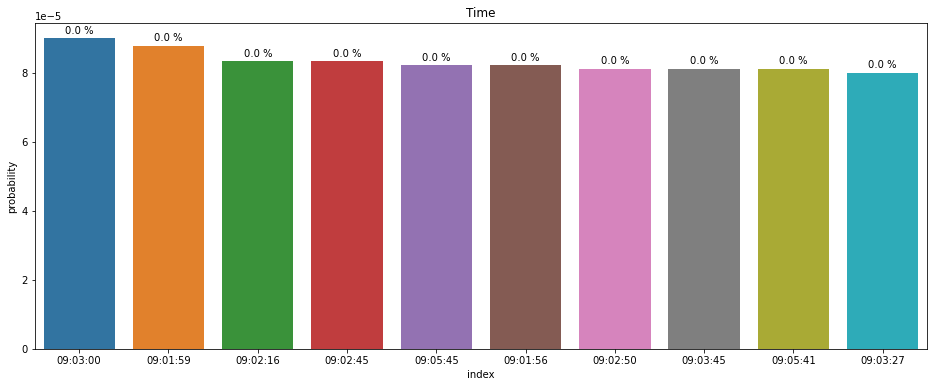

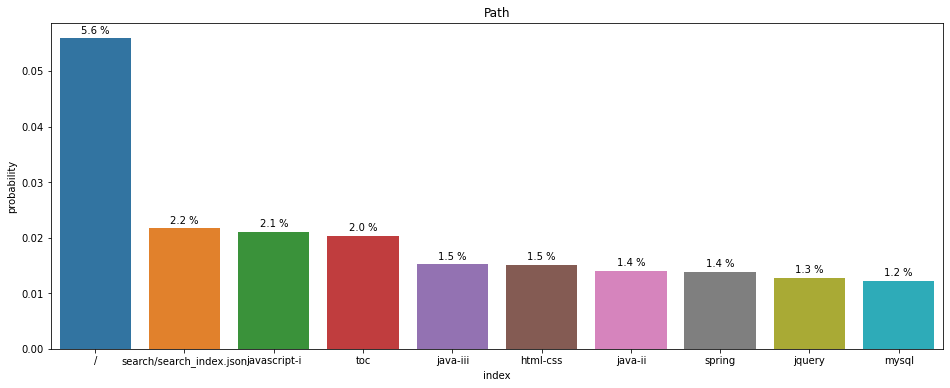

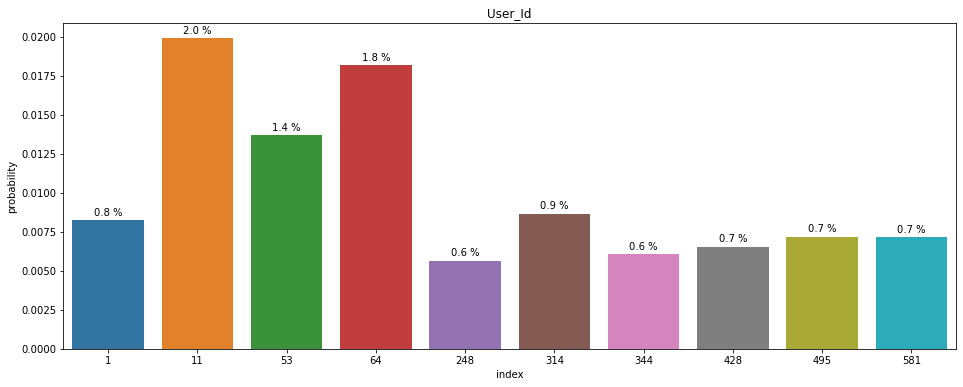

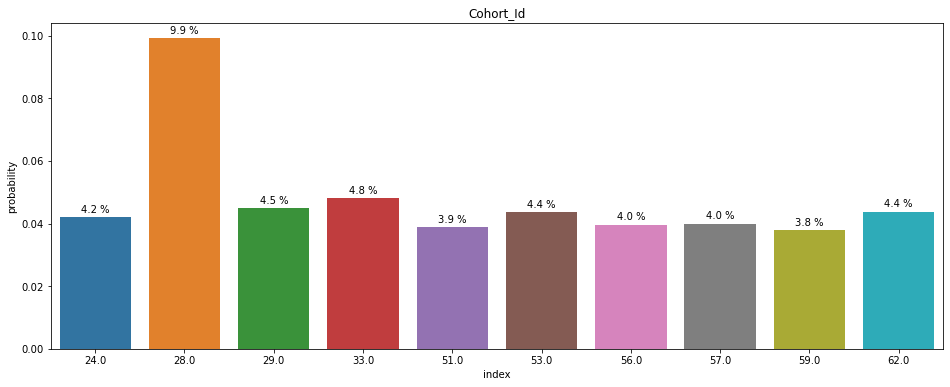

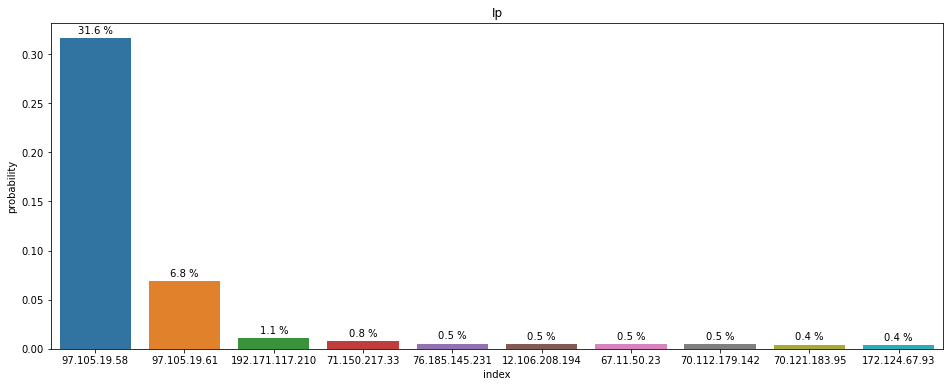

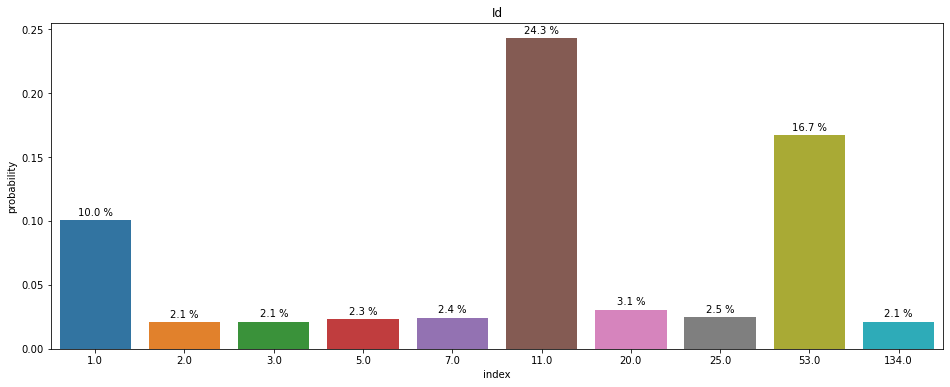

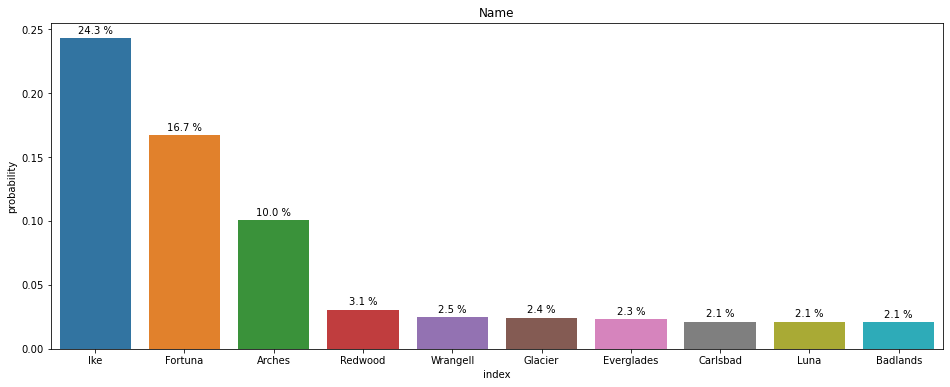

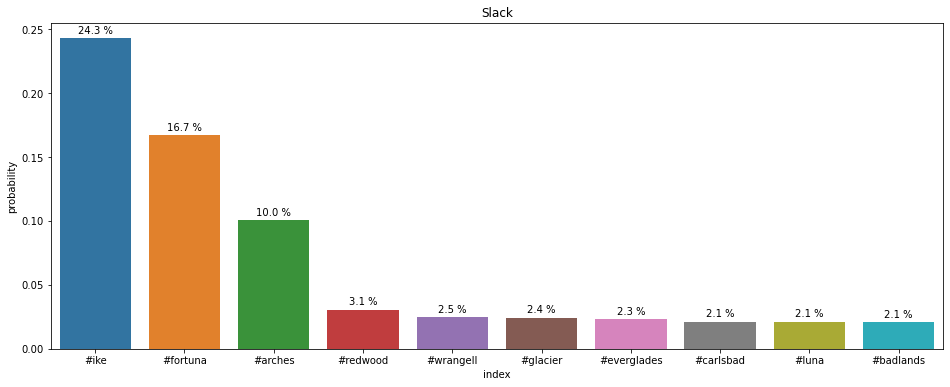

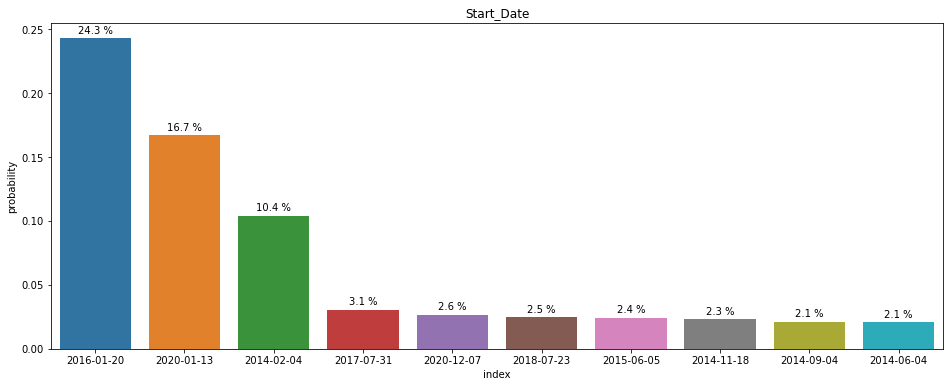

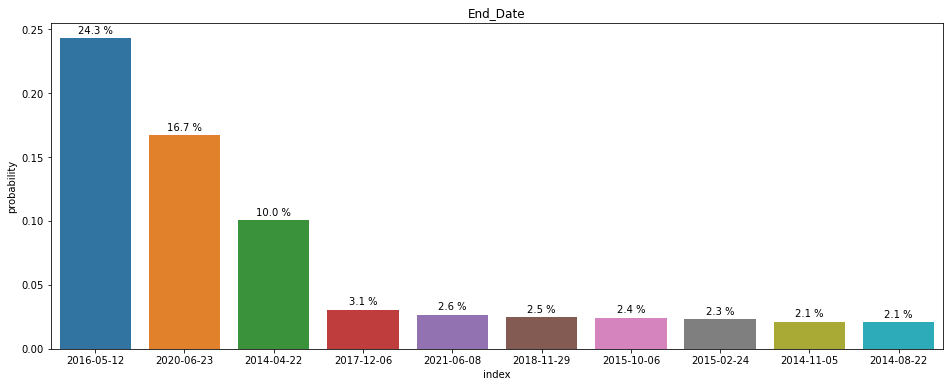

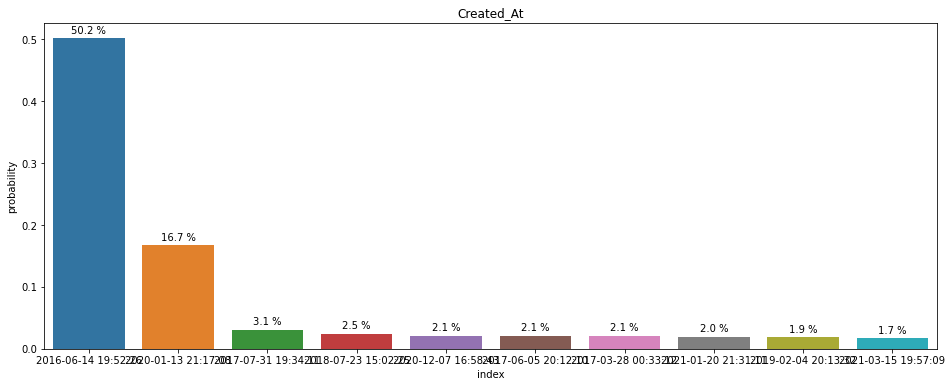

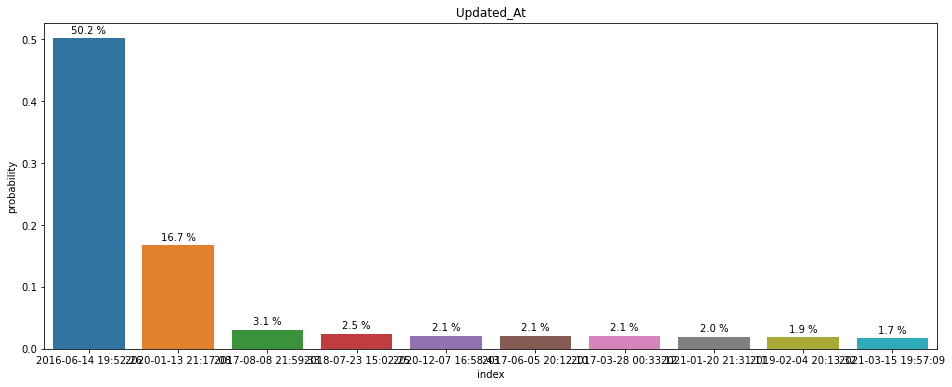

ValueError: min() arg is an empty sequence

<Figure size 1152x432 with 0 Axes>

In [17]:
for col in df.columns:
    plt.figure(figsize=(16, 6))
    splot = sns.barplot(x='index', y=col, data=df[col].value_counts(normalize=True).reset_index().sort_values(
        by=col, ascending=False).head(10))
    for p in splot.patches:
        splot.annotate(format(p.get_height() * 100, '.1f') + ' %', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 8), 
                   textcoords = 'offset points')
    plt.title(col.title())
    plt.ylabel('probability')
    plt.show()

In [19]:
df.groupby('path').head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2.0,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895545,2021-04-19,09:53:33,dataframes,904,137.0,70.117.3.180,NaN,None,None,None,None,None,None,None,NaN
895546,2021-04-19,09:53:36,dataframes,904,137.0,70.117.3.180,NaN,None,None,None,None,None,None,None,NaN
896758,2021-04-19,16:04:53,appendix/further-reading/jquery/effects,882,135.0,76.250.151.105,NaN,None,None,None,None,None,None,None,NaN
897692,2021-04-20,10:35:08,dataframes,895,137.0,96.8.253.119,NaN,None,None,None,None,None,None,None,NaN
